<h1>Regression </h1>

<h2>Regression kept simple</h2>

<h4>Helpers </h4>

In [12]:
def mean(x):
    return sum(x) / len(x)

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

import math
def standard_deviation(x):
    return math.sqrt(variance(x))

def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def covariance (x,y):
    n= len(x)
    return dot ( de_mean(x), de_mean(y)) / (n-1)

def correlation (x, y):
    stdev_x = standard_deviation (x)
    stdev_y = standard_deviation (y)
    if stdev_x >0 and stdev_y >0:
        return covariance(x,y) / (stdev_x * stdev_y)
    else: 
        return 0

<h4>predict and error </h4>

In [2]:
# a predict funcion
def predict (alpha, beta , x_i):
    return alpha + beta * x_i
alpha=-3
beta = 2.5
predict (alpha, beta , 8)

17.0

In [3]:
# error from the actual mesure
def error (alpha, beta , x_i , y_i):
    return y_i -predict(alpha, beta, x_i)
error(alpha, beta, 8, 19.2)

2.1999999999999993

In [4]:
#squared errors  SSE
def sum_of_squared_errors(alpha,beta, x,y):
    return sum(error(alpha,beta , x_i, y_i)**2  for x_i, y_i in zip(x,y))
x=[8,7,6]
y=[19.2, 14.1, 11.8]
sum_of_squared_errors(alpha,beta, x,y)

5.039999999999997

In [5]:
print(correlation(x,y))
print(standard_deviation(y))
print(standard_deviation(x))


0.9769597655243559
3.7872593432894623
1.0


but let's choose the least square errors (LSE) and find beta and alpha 

In [43]:
def least_squares_fit(x,y):
    beta = correlation (x,y) * standard_deviation(y) / standard_deviation(x)#for incr by stdX, incr by corr * stdY
    alpha = mean(y) - beta* mean(x)
    return alpha, beta
alphaC, betaC =least_squares_fit(x,y)
print("alpha: {:.2f}, beta : {:.2f}".format(alphaC,betaC))

alpha: -10.87, beta : 3.70


<p><span style="color:purple"> define `least_squares_fit()` </span>

-10.866666666666664


3.6999999999999993

<h4>Measure of performance: <i> coefficient of determination </i> </h4>

In [46]:
def total_sum_of_squares(y):
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))
def r_squared(alpha, beta, x, y):
    """the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model"""
    return 1.0 - (sum_of_squared_errors(alpha,beta, x, y) /
total_sum_of_squares(y))

In [50]:
print("CoD for the first 'invented' alpha and beta ")
print("{:.2f}".format(r_squared(alpha,beta ,x , y)))
print("CoD for the first 'invented' alpha and beta ")
print("{:.2f}".format(r_squared(alphaC,betaC ,x , y)))

CoD for the first 'invented' alpha and beta 
0.82
CoD for the first 'invented' alpha and beta 
0.95


<h4>tying the functions with the avocado dataset </h4>

In [13]:
import csv
a= open("avocado.csv",'r') 
reader=csv.reader(a)
header = next(a)
price=[]
volume=[]
for line in reader:
    price.append(float(line[2]))
    volume.append(float(line[3]))

In [30]:
print(mean(price))
print("{:,.2f}".format(mean(volume) ) )

1.4059784097758825
850,644.01


In [15]:
print(correlation(price,volume))

-0.1927523871527195


In [25]:
alpha,beta = least_square_fit(price,volume)
print("alpha: {:,.2f}, beta: {:,.2f}".format(alpha,beta))

alpha: 3,174,917.54, beta: -1,653,136.00


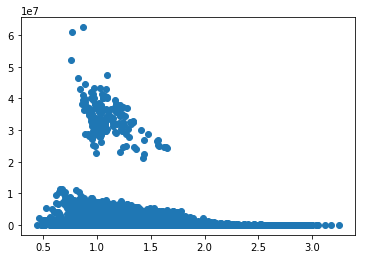

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
fig=figsize()
plt.scatter(price,volume)
plt.xlabel="price"
plt.ylabel="volume"


(array([  64.,  267.,  860., 1772., 2409., 2415., 2191., 2315., 1931.,
        1481., 1051.,  621.,  352.,  246.,   92.,   85.,   47.,   39.,
           8.,    3.]),
 array([0.44  , 0.5805, 0.721 , 0.8615, 1.002 , 1.1425, 1.283 , 1.4235,
        1.564 , 1.7045, 1.845 , 1.9855, 2.126 , 2.2665, 2.407 , 2.5475,
        2.688 , 2.8285, 2.969 , 3.1095, 3.25  ]),
 <a list of 20 Patch objects>)

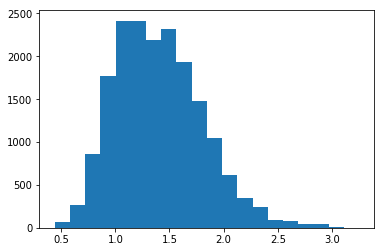

In [41]:
from collections import Counter
plt.hist(price, bins=20)

In [43]:
import pandas as pd
av = pd.read_csv("avocado.csv")
av.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [61]:
av.loc([ :2], ['region'] )

SyntaxError: invalid syntax (<ipython-input-61-9b3d68fe66a4>, line 1)

In [60]:
av[['AveragePrice', 'region']].groupby('region').aggregate(mean)

,AveragePrice
region,
Albany,1.561036
Atlanta,1.337959
BaltimoreWashington,1.534231
Boise,1.348136
Boston,1.530888
BuffaloRochester,1.516834
California,1.395325
Charlotte,1.606036
Chicago,1.556775
